# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [43]:
import pandas as pd
import os.path

%matplotlib inline

pd.options.display.max_rows = 10
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv("../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv", index_col="id")


Poglejmo si podatke.

In [5]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [6]:
filmi.sort_values("ocena")

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9739,7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37659,NaN,NaN,Cumali Ceber goes to a vacation with his child...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
...,...,...,...,...,...,...,...,...,...,...
4059,252488,Hababam Sinifi Sinifta Kaldi,91,1976,9.0,NaN,21288,NaN,NaN,A young and beautiful female teacher starts wo...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."


Poberite stolpec ocen.

In [8]:
ocene = filmi.sort_values("ocena")

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [ ]:
print(type(filmi['ocena'])) #seznam
print(type(filmi[['ocena']])) #podtabela

Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [25]:
ocene_rounded = filmi["ocena"].round(0)

Dodajte zaokrožene vrednosti v podatke.

In [27]:
filmi["ocene_rounded"] = ocene_rounded
filmi.tail(3)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,ocene_rounded
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...,7.0
9999,12749596,Host,57,2020,6.6,72.0,8713,NaN,NaN,Six friends hire a medium to hold a seance via...,7.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [28]:
filmi.drop(columns = "ocene_rounded")

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [30]:
naslov_leto_filmi = filmi[["naslov", "leto", "glasovi"]]

filmi_simple = naslov_leto_filmi.copy()
filmi_simple["ocene_rounded"] = ocene_rounded

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [32]:
pred_1930 = filmi["leto"] < 1930
po_2017 = filmi["leto"] > 2017

filmi[pred_1930 | po_2017]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,ocene_rounded
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr...",6.0
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...,6.0
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...,7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [35]:
def vsaj_dve(s):
    w = s.split()
    return len(w) <= 2

kratki_naslovi = filmi["naslov"].apply(vsaj_dve)

dobre_ocene = filmi["ocena"] > 8

filmi[kratki_naslovi & dobre_ocene]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,ocene_rounded
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
11,15324,Sherlock Jr.,45,1924,8.2,NaN,40303,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
13,15864,Zlata mrzlica,95,1925,8.2,NaN,98472,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
14,15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9898,8579674,1917,119,2019,8.3,78.0,375975,159227644.0,R,"April 6th, 1917. As a regiment assembles to wa...",8.0
9934,9052870,Chhichhore,143,2019,8.2,NaN,30459,898575.0,NaN,"A tragic incident forces Anirudh, a middle-age...",8.0
9957,9477520,Asuran,141,2019,8.5,NaN,8974,NaN,NaN,The teenage son of a farmer from an underprivi...,8.0
9971,9900782,Kaithi,145,2019,8.5,NaN,8741,NaN,NaN,A recently released prisoner becomes involved ...,8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [40]:
filmi_po_ocenah = filmi.groupby("ocena").size()

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='ocena'>

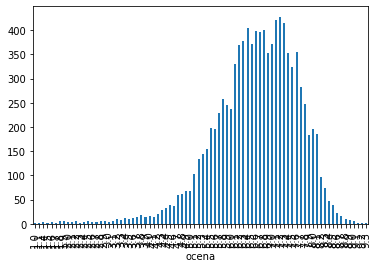

In [44]:
filmi_po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<AxesSubplot:title={'center':'ocene_rounded'}>]], dtype=object)

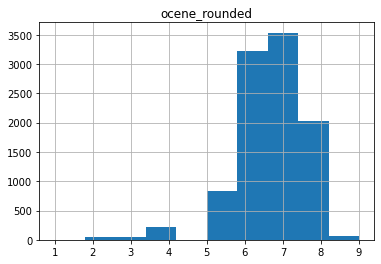

In [45]:
filmi_simple[["ocene_rounded"]].hist()

### Izris povprečne dolžine filma glede na leto

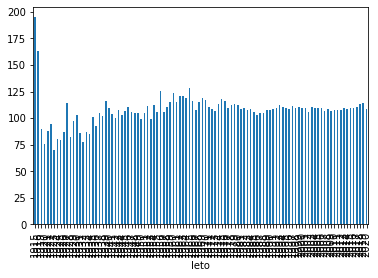

In [48]:
filmi_po_letih = filmi.groupby("leto")
povprecja_po_letih = filmi_po_letih.mean()
povprecne_dolzine = povprecja_po_letih["dolzina"].plot.bar()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

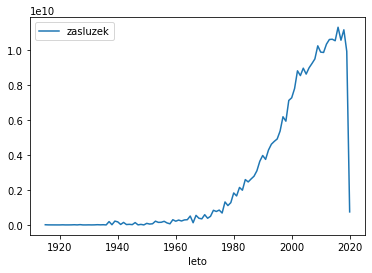

In [49]:
filmi_po_letih.sum()[["zasluzek"]].plot()